In [1]:
import requests
from scrapy import Selector
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pygsheets
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from textblob import TextBlob
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\ProgramData\Anaconda3\lib\site-packages\past\types\oldstr.py:33: DeprecationWarning: invalid escape sequence \d
  """


In [2]:
reviews = pd.read_csv('olist_order_reviews_dataset.csv')

In [3]:
title = reviews[reviews['review_comment_title'].isnull()==False]

In [4]:
message = reviews[reviews['review_comment_message'].isna()==False]

In [5]:
def word_cloud_figure(col,
            max_words=None,
            background_color='white',
            stopwords=None):
    string_text = str(col)
    wordCloud = WordCloud(max_words=max_words,
                        repeat=False,
                        stopwords=stopwords,
                        background_color=background_color
                        ).generate(string_text)
    plt.figure(figsize=(10,7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
    return(plt.show())

In [6]:
stwords = nltk.corpus.stopwords.words('portuguese')

additional = ['do', 'um', 'uma', 'no', 'a', 'o', 'com', 'por', 'em', 'de', 'sobre', 'diz', 'da', 'é', 'como', 'que', 'dentro', 
            'Após', 'diz', 'Entenda', 'dentro', 'ainda', 'contra', 'Brasil', 'caso', 'cada','produto','nA','entrega','pedido',
            'muito','loja','não','recebi','recomendo','Name', 'entregue','nao','dtype', 'object', 'review_comment_title','length',
            'Length','eu','comprei','chegou','meu','compra','foi','veio','para','pedido','minha','saber', 'se', 'houve', 'este',
            'saber','dia','split','pedi','faz','ser','enviei','agora','porque','faço','haviam','ter','tudo','title_clean',
            'duas', 'unidades', 'unidade','bem']

adjectives = ['super','ótimo','top','perfeita','bom','otimo','maravilhoso','excelente','lindo','show','ótima',
              'satisfeito','boa','recoendo','mt','otima','bastante','nota','perfeito','recomento','recomendado','máxima','sempre',
              'certeza','ruim','insatisfeita','médio','ruim','péssimo','posso','péssima','negativo','nota3',
              'pruto','horrível','mercadoria','primeiro','sei','porém','produtos','nota','aind','lamenetável','nota','prod',
              'eficiente','pouco','gostei','satisfeita','vai','tô','obrigado','realizada','muita','erra','erraram',
              'gostei','amei','parabéns','adorei','apaixonada','maravilha','3desinfe','rápidissima','bonito','indico','sendo',
              'lannister','achei','parabéns','gostaria','deveria','ate','insatisfeito','recomendar','entragou','entregou','ok',
              'muiiita','netinho','ok','ta','obrigada','parabens','Parabens','demais','ilus', 'empres','diante','certinho',
              'site','patrulha','canina','mochila','amim','travandopelo','fe','pois','esperava','deveria','gostaria','nada',
              'cheguei','pra','conseguiu','reconhecer','ocorre','momento','mim','3desinfector','todos','dispensada','cond','outros'
              ,'pá','dado','estao','feliz','outro','chega','targaryen','ocorreu','nomeat','ficamos','pelinho','marca','tomara',
              'amar','vou','comprar','fantástico','voltarei','começou','efetuada','acredito','somente','aqui','consta','usb','capa','cinco',
              'joias','apenas','portas','constam','programe','lustres','folhas','pensar','causou','condiz','fiz','além','midea',
              'parceira','parte','chegar','tecid','blocos','lustr','balde','pq','fevereiro','transfer','un','letras','lebre',
              'eva','escuro','ar','faltando','gato','precisa','nº','progressiva','varias','feminino','dias','pe','papel','pagar',
              'tres','viagem','anúncio','desse','corre','baratheon','qpensei','nomeatualizar','fe','mi','segunda','satisfatório',
              'completamente','vendedor','lojas','internet','sempre','vendedores','solicitado','encomendas','compraria','dure',
              'compro','enviaram','dezembro','mal','dois','hoje','condici','lustre','stark','so','propria','ja','tapete',
              'vez','axo','quero','fiquei','paguei','certo','q','nunca','nenhum','nenhuma','email','assim','mesmosuper']


              
stwords = stwords + additional + adjectives


In [7]:
def pre_processing_col(col, stopwords=nltk.corpus.stopwords.words('portuguese')):
    # transform the words into lower case
    col = col.apply(lambda x: x.lower())
    # removing punctuation
    col = col.str.replace('[^\w\s]', '')
    # removing numbers
    col = col.apply(
    # iterate through each item in a returns a list of words and joins the split words into a sentence again
    lambda x:' '.join([x for x in x.split() if not x.isdigit()]))
    # stopwords
    # removing stopwords
    col = col.apply(lambda x: ' '.join([x for x in x.split() if x not in stopwords]))
    return(col)

In [8]:
message['message_clean'] = pre_processing_col(message['review_comment_message'],stwords)

In [9]:
title['title_clean'] = pre_processing_col(title['review_comment_title'],stwords)

In [10]:
def tokenization(col):
    serie = pd.Series(col.apply(lambda x:x.split()))
    return(serie)

In [11]:
title['token'] = tokenization(title['title_clean'])

In [12]:
message['token'] = tokenization(message['message_clean'])

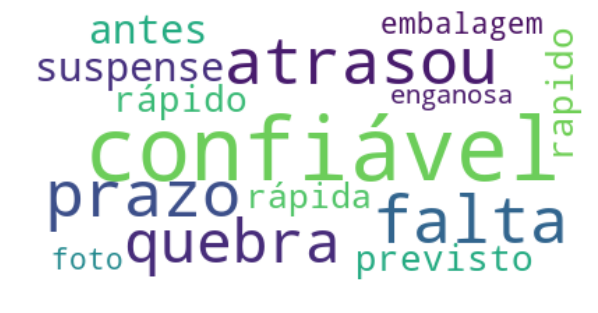

In [26]:
word_cloud_figure(title['title_clean'],stopwords=stwords)

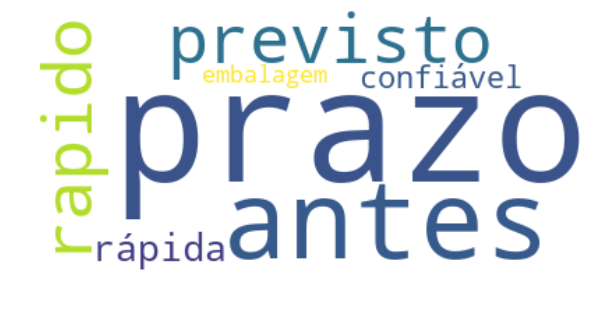

In [13]:
word_cloud_figure(title[title['review_score']>3]['title_clean'],stopwords=stwords)

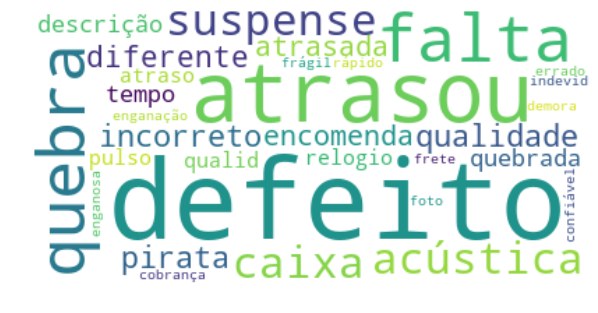

In [14]:
word_cloud_figure(title[title['review_score']<4]['title_clean'],stopwords=stwords)

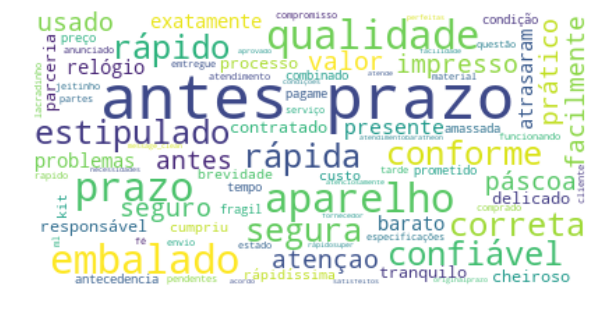

In [15]:
word_cloud_figure(message[message['review_score']>3]['message_clean'], stopwords=stwords)

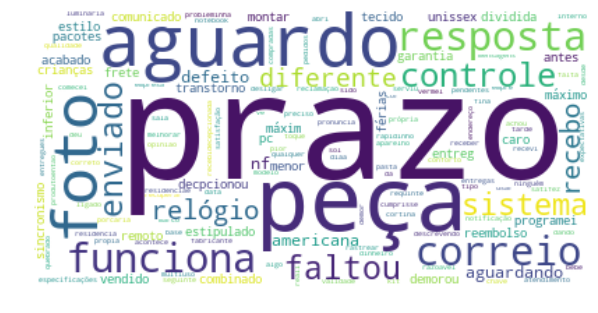

In [16]:
word_cloud_figure(message[message['review_score']<4]['message_clean'], stopwords=stwords)

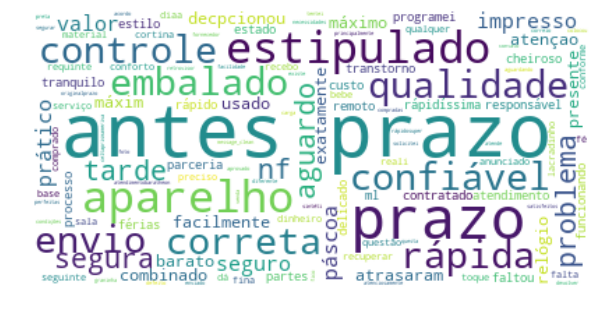

In [27]:
word_cloud_figure(message['message_clean'], stopwords=stwords)

In [17]:
# Creating a term dictionary of the text corpus
dictionary = corpora.Dictionary(message['token'])
# creating a Document Text Matrix with the dictionary
doc_term_matrix = [dictionary.doc2bow(i) for i in message['token'] ]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=5, 
                random_state=100)

In [18]:
# Printing the topics
lda_model.print_topics()

[(0,
  '0.018*"cor" + 0.016*"caixa" + 0.015*"entregaram" + 0.013*"embalagem" + 0.008*"demora" + 0.008*"sim" + 0.008*"presente" + 0.007*"preço" + 0.007*"relógio" + 0.007*"pena"'),
 (1,
  '0.215*"prazo" + 0.146*"antes" + 0.022*"previsto" + 0.022*"embalado" + 0.021*"conforme" + 0.019*"data" + 0.012*"esperado" + 0.011*"estado" + 0.009*"correto" + 0.009*"condições"'),
 (2,
  '0.021*"atendimento" + 0.015*"foto" + 0.011*"dinheiro" + 0.011*"demorou" + 0.009*"aguardando" + 0.009*"errado" + 0.009*"diferente" + 0.008*"problema" + 0.007*"primeira" + 0.007*"volta"'),
 (3,
  '0.088*"qualidade" + 0.014*"tempo" + 0.013*"expectativas" + 0.011*"material" + 0.011*"correios" + 0.011*"preço" + 0.011*"atraso" + 0.011*"rápida" + 0.010*"empresa" + 0.009*"cliente"'),
 (4,
  '0.025*"rápido" + 0.019*"rápida" + 0.015*"frete" + 0.013*"contato" + 0.010*"receber" + 0.010*"problema" + 0.009*"resposta" + 0.008*"valor" + 0.008*"falta" + 0.008*"correios"')]

In [19]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.149012  0.127619       1        1  23.601583
1     -0.342341  0.084290       2        1  20.629654
2      0.114069  0.074519       3        1  19.581755
3     -0.003324 -0.290928       4        1  18.244001
0      0.082585  0.004500       5        1  17.943005, topic_info=     Category         Freq          Term        Total  loglift  logprob
2     Default  7336.000000         prazo  7336.000000  30.0000  30.0000
0     Default  4883.000000         antes  4883.000000  29.0000  29.0000
42    Default  2602.000000     qualidade  2602.000000  28.0000  28.0000
65    Default   960.000000        rápido   960.000000  27.0000  27.0000
468   Default   745.000000      previsto   745.000000  26.0000  26.0000
352   Default   724.000000      embalado   724.000000  25.0000  25.0000
208   Default   683.000000   atendimento   683.000000  24.0000  24.0000
372   Default   759.000000      conforme   759.000000  23.0000  23.0000
86    Default   650.000000          data   650.000000  22.0000  22.0000
255   Default   534.000000           cor   534.000000  21.0000  21.0000
39    Default   563.000000         frete   563.000000  20.0000  20.0000
56    Default   491.000000          foto   491.000000  19.0000  19.0000
112   Default   484.000000         caixa   484.000000  18.0000  18.0000
74    Default  1334.000000        rápida  1334.000000  17.0000  17.0000
420   Default   409.000000      esperado   409.000000  16.0000  16.0000
586   Default   395.000000  expectativas   395.000000  15.0000  15.0000
553   Default   474.000000    entregaram   474.000000  14.0000  14.0000
686   Default   380.000000        estado   380.000000  13.0000  13.0000
85    Default   353.000000       demorou   353.000000  12.0000  12.0000
446   Default   362.000000      dinheiro   362.000000  11.0000  11.0000
538   Default   603.000000       contato   603.000000  10.0000  10.0000
346   Default   407.000000     embalagem   407.000000   9.0000   9.0000
487   Default   535.000000         preço   535.000000   8.0000   8.0000
1772  Default   321.000000        atraso   321.000000   7.0000   7.0000
333   Default   456.000000      material   456.000000   6.0000   6.0000
62    Default   528.000000         tempo   528.000000   5.0000   5.0000
64    Default   370.000000      resposta   370.000000   4.0000   4.0000
748   Default   300.000000     condições   300.000000   3.0000   3.0000
193   Default   277.000000       atendeu   277.000000   2.0000   2.0000
121   Default   754.000000      correios   754.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
298    Topic5   136.307327        passou   139.798447   1.6927  -5.3603
112    Topic5   458.138672         caixa   484.844147   1.6613  -4.1480
473    Topic5    97.531204         preta   100.252449   1.6905  -5.6950
831    Topic5   182.876617          vale   191.214661   1.6734  -5.0664
556    Topic5   162.873642       cadeira   169.928253   1.6756  -5.1822
2410   Topic5    69.835800     comprando    71.346970   1.6966  -6.0290
1113   Topic5   108.894928         junto   112.889519   1.6819  -5.5848
495    Topic5   220.684692           sim   235.791672   1.6518  -4.8784
111    Topic5    88.581039      amassada    91.260307   1.6882  -5.7912
553    Topic5   428.043488    entregaram   474.750580   1.6144  -4.2159
346    Topic5   367.088745     embalagem   407.992340   1.6123  -4.3696
595    Topic5   119.010376      plástico   125.905304   1.6617  -5.4960
141    Topic5   106.029175       solução   111.767120   1.6653  -5.6115
701    Topic5   190.885910          pena   219.568985   1.5780  -5.0235
114    Topic5   113.071648         gosto   121.705154   1.6444  -5.5471
98     Topic5   129.719879          jogo   143.153183   1.6194  -5.4098
786    Topic5   172.884323    totalmente   205.175842   1.5467  -5.1225
328    Topic5   178.186142    satisfação   221.3806

In [20]:
bigrm1 = []
bigrm2 = []
bigrm3 = []
bigrm4 = []
bigrm5 = []

for i in range(len(message)):
    if(message['review_score'].iloc[i]==1):
        bigrm1.append(list(nltk.bigrams(message['message_clean'].iloc[i].split())))
    elif(message['review_score'].iloc[i]==2):
        bigrm2.append(list(nltk.bigrams(message['message_clean'].iloc[i].split())))
    elif(message['review_score'].iloc[i]==3):
        bigrm3.append(list(nltk.bigrams(message['message_clean'].iloc[i].split())))
    elif(message['review_score'].iloc[i]==4):
        bigrm4.append(list(nltk.bigrams(message['message_clean'].iloc[i].split())))
    elif(message['review_score'].iloc[i]==5):
        bigrm5.append(list(nltk.bigrams(message['message_clean'].iloc[i].split())))

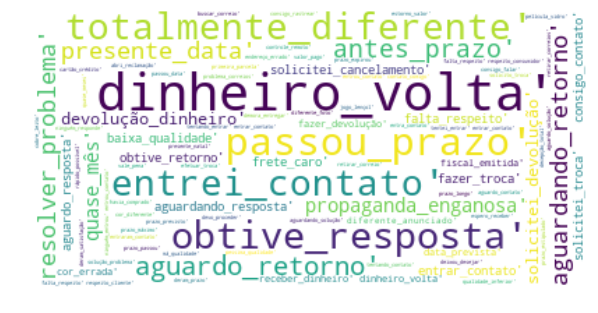

In [21]:
words_baixo = []

for i in range(len(bigrm1)):
    for j in range(len(bigrm1[i])):
        words_baixo.append(bigrm1[i][j][0]+'_'+bigrm1[i][j][1])

word_cloud_figure(words_baixo)

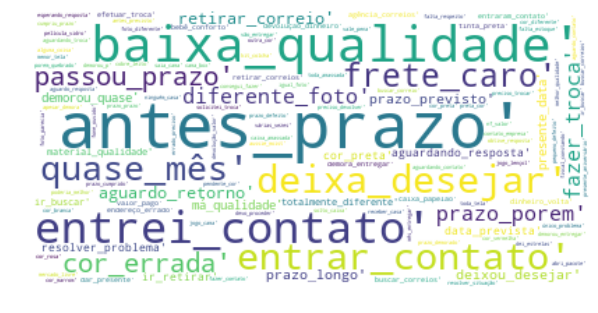

In [22]:
words_baixo = []

for i in range(len(bigrm2)):
    for j in range(len(bigrm2[i])):
        words_baixo.append(bigrm2[i][j][0]+'_'+bigrm2[i][j][1])

word_cloud_figure(words_baixo)

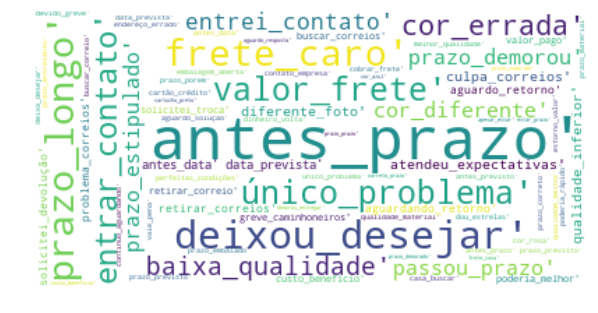

In [23]:
words_baixo = []

for i in range(len(bigrm3)):
    for j in range(len(bigrm3[i])):
        words_baixo.append(bigrm3[i][j][0]+'_'+bigrm3[i][j][1])

word_cloud_figure(words_baixo)

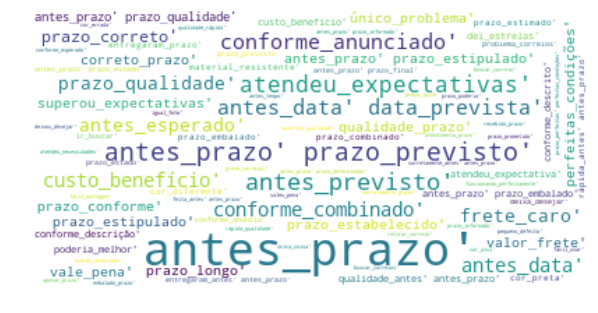

In [24]:
words_baixo = []

for i in range(len(bigrm4)):
    for j in range(len(bigrm4[i])):
        words_baixo.append(bigrm4[i][j][0]+'_'+bigrm4[i][j][1])

word_cloud_figure(words_baixo)

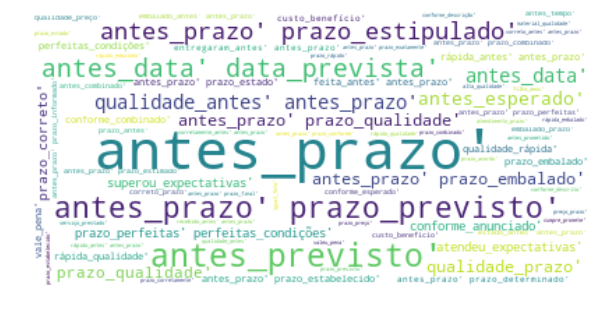

In [25]:
words_baixo = []

for i in range(len(bigrm5)):
    for j in range(len(bigrm5[i])):
        words_baixo.append(bigrm5[i][j][0]+'_'+bigrm5[i][j][1])

word_cloud_figure(words_baixo)